<a href="https://colab.research.google.com/github/ivandwinugraha/Tubes_ML/blob/main/(versi_1)_Kegiatan_Modul_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Soal Praktikum Artificial Neural Network**

## Kegiatan 1 **(Individu)** 
Persentase Penilaian: 70%

Pada kegiatan ini, buatlah model Neural Network untuk mengklasifikasikan citra penyakit pneumonia. Dataset citra yang digunakan dapat diakses pada laman *https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia*. Dataset tersebut memiliki dua kategori gambar, yaitu Normal dan Pneumonia, dimana seluruh dataset berjumlah 5.856 data dengan ukuran 1.500 × 1.500 piksel dan format JPEG. 

### 1. Load Data & Preprocessing

1. Load dataset menggunakan Kaggle API.
2. Unzip dataset yang telah diunduh.
3. Buatlah 4 folder baru dengan nama *chest_images* (didalamnya dibuat folder *pneumonia* dan *normal*). Disarankan untuk membuat folder baru didalam folder */content*.
4. Pindahkan seluruh dataset pada folder */content/chest_xray/chest_xray/train/PNEUMONIA* ke dalam folder */content/chest_images/pneumonia*.
5. Ulangi poin nomor 4 pada folder test dan validation, sesuaikan kembali masing-masing kategori gambar ke dalam folder pneumonia/normal.
6. Lakukan splitting ulang dataset pada folder */content/chest_images* menjadi 70% data train dan 30% data validation.
7. Gather data train dan validation.
8. Cek shape dan banyak dataset pada masing-masing data train dan validation.
9. Tampilkan 4 gambar normal dan 4 gambar pneumonia dalam 1 grafik beserta masing-masing labelnya.
10. Label Encoder.
11. Lakukan proses normalisasi menggunakan ImageDataGenerator.
12. Tampilkan hasil sebelum dan sesudah dilakukan normalisasi dengan ImageDataGenerator.





In [15]:
# install splitfolders to split dataset
! pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
# import all libraries needed
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import os
import zipfile
import shutil
import splitfolders
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
from sklearn.preprocessing import LabelEncoder

In [17]:
# import all libraries needed
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import os
import zipfile
import shutil
import splitfolders
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
from sklearn.preprocessing import LabelEncoder

In [18]:
! chmod 600 '/content/kaggle.json' 

In [19]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:15<00:00, 153MB/s]
100% 2.29G/2.29G [00:15<00:00, 158MB/s]


In [44]:
# extract from zip
local_zip = '/content/chest-xray-pneumonia.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [21]:
# create new folder specifically
! mkdir '/content/chest_images'
! mkdir '/content/chest_images/pneumonia'
! mkdir '/content/chest_images/normal'
! mkdir '/content/chest_split'

In [22]:
# move all images
source = '/content/chest_xray/chest_xray/train/PNEUMONIA/'
destination = '/content/chest_images/pneumonia/'
allfiles = os.listdir(source)

for f in allfiles:
    shutil.move(source + f, destination + f)

In [23]:
# move all images
source = '/content/chest_xray/chest_xray/train/NORMAL/'
destination = '/content/chest_images/normal/'
allfiles = os.listdir(source)

for f in allfiles:
    shutil.move(source + f, destination + f)

In [24]:
# move all images
source = '/content/chest_xray/chest_xray/test/PNEUMONIA/'
destination = '/content/chest_images/pneumonia/'
allfiles = os.listdir(source)

for f in allfiles:
    shutil.move(source + f, destination + f)

In [25]:
# move all images
source = '/content/chest_xray/chest_xray/test/NORMAL/'
destination = '/content/chest_images/normal/'
allfiles = os.listdir(source)

for f in allfiles:
    shutil.move(source + f, destination + f)

In [26]:
# move all images
source = '/content/chest_xray/chest_xray/val/PNEUMONIA/'
destination = '/content/chest_images/pneumonia/'
allfiles = os.listdir(source)

for f in allfiles:
    shutil.move(source + f, destination + f)

In [27]:
# move all images
source = '/content/chest_xray/chest_xray/val/NORMAL/'
destination = '/content/chest_images/normal/'
allfiles = os.listdir(source)

for f in allfiles:
    shutil.move(source + f, destination + f)

In [28]:
# split dataset
data_dir = '/content/chest_images'
output = '/content/chest_split'
splitfolders.ratio(data_dir, output=output, seed=1337, ratio=(.7, .3, .0))

Copying files: 5856 files [00:04, 1254.53 files/s]


In [29]:
# create train, val, test paths
base_dir = '/content/chest_split'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')


In [30]:
# gather train dataset
trainX = []
trainY = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            trainX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            trainY.append(label)

trainX = np.array(trainX)
trainY = np.array(trainY)

In [31]:
# gather test data
testX = []
testY = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            testX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            testY.append(label)

testX = np.array(testX)
testY = np.array(testY)

In [32]:
# gather validation data
valX = []
valY = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            valX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            valY.append(label)

valX = np.array(valX)
valY = np.array(valY)

In [33]:
# check shape of each images in train & test dataset
print("Train Data=", trainX.shape)
print("Train Label=", trainY.shape)
print("Validation Data=", valX.shape)
print("Validation Label=", valY.shape)

Train Data= (4099, 150, 150, 3)
Train Label= (4099,)
Validation Data= (1755, 150, 150, 3)
Validation Label= (1755,)


In [34]:
# label encoder implementation in each train & test label
lb = LabelEncoder()
trainY = lb.fit_transform(trainY)
valY = lb.fit_transform(valY)
# testY = lb.fit_transform(testY)

In [35]:
# label encoder implementation in each train & test label
lb = LabelEncoder()
trainY = lb.fit_transform(trainY)
valY = lb.fit_transform(valY)
# testY = lb.fit_transform(testY)

In [36]:
# normalize the scale in every images using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [37]:
# implement ImageDataGenerator in train, test data, & each label
train_iterator = datagen.flow(trainX, trainY, batch_size=64)
val_iterator = datagen.flow(valX, valY, batch_size=64)
print('Batches train=%d, validation=%d' % (len(train_iterator), len(val_iterator)))

Batches train=65, validation=28


In [38]:
# check minimum & maximum scale after normalize each images
batchX, batchy = train_iterator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(64, 150, 150, 3), min=0.000, max=1.000


### 2. Modelling

Buatlah arsitektur model dengan kriteria:
1. Gunakan 1 layer input dengan ukuran layer input (shape) menjadi 150 x 150 piksel.
2. Gunakan 3 hidden layer sesuai dengan analisa masing-masing.
3. Lakukan hyperparameter tuning dan gunakan fungsi aktivasi sesuai analisa masing-masing.
4. Lakukan proses training minimal 100 epoch.

In [39]:
# build a simple ANN model
model = Sequential()
model.add(InputLayer(input_shape=[150,150,3]))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 128)               8640128   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 8,649,441
Trainable params: 8,649,441
Non-trainable params: 0
_________________________________________________________________


In [40]:
# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
# training & saving history of every epoch
H = model.fit(train_iterator, epochs=100, validation_data=val_iterator)

Epoch 1/100
65/65 [==============================] - 6s 33ms/step - loss: 1.4842 - accuracy: 0.7314 - val_loss: 0.4038 - val_accuracy: 0.8593
Epoch 2/100
65/65 [==============================] - 2s 31ms/step - loss: 0.3595 - accuracy: 0.8600 - val_loss: 0.6569 - val_accuracy: 0.7487
Epoch 3/100
65/65 [==============================] - 2s 31ms/step - loss: 0.2930 - accuracy: 0.8946 - val_loss: 0.1908 - val_accuracy: 0.9214
Epoch 4/100
65/65 [==============================] - 2s 31ms/step - loss: 0.2121 - accuracy: 0.9205 - val_loss: 0.1744 - val_accuracy: 0.9265
Epoch 5/100
65/65 [==============================] - 2s 31ms/step - loss: 0.3535 - accuracy: 0.8851 - val_loss: 0.2710 - val_accuracy: 0.8923
Epoch 6/100
65/65 [==============================] - 2s 32ms/step - loss: 0.2439 - accuracy: 0.9075 - val_loss: 0.1859 - val_accuracy: 0.9373
Epoch 7/100
65/65 [==============================] - 2s 32ms/step - loss: 0.1789 - accuracy: 0.9288 - val_loss: 0.1605 - val_accuracy: 0.9396
Epoch 

### 3. Evaluasi Model

1. Plot hasil training model berupa hasil validasi akurasi dan validasi loss.
2. Buatlah report klasifikasi beserta dengan keterangan labelnya.
4. Tampilkan matriks evaluasi yang lebih bervariasi seperti balanced accuracy, roc, auc, atau yang lainnya. Jelaskan kepada asisten secara lengkap.
3. Hasil akurasi model minimal diatas 80%.

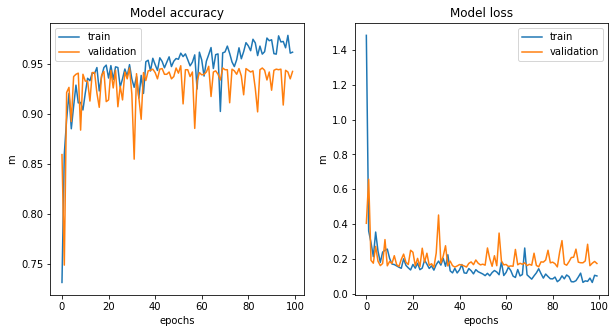

In [42]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)

metric = ['accuracy', 'loss']
for i, m in enumerate(metric):
  ax[i].plot(H.history[m])
  ax[i].plot(H.history['val_'+ m])
  ax[i].set_title('Model {}'.format(m))
  ax[i].set_xlabel('epochs')
  ax[i].set_ylabel('m')
  ax[i].legend(['train', 'validation'])

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

pred=model.predict(testX)
arr = (pred > 0.5).astype(np.int)
pred=np.array([1 if row>=0.5 else 0 for row in pred])
print(classification_report(arr, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       467
           1       1.00      1.00      1.00      1288

    accuracy                           1.00      1755
   macro avg       1.00      1.00      1.00      1755
weighted avg       1.00      1.00      1.00      1755



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


## Kegiatan 2 **(Kelompok)**
Persentase Penilaian: 30%

### Ketentuan Umum

1. Bentuk tim yang beranggotakan maksimal 2 orang dan tentukan ketua kelompoknya (ketua kelompok wajib berasal dari kelas yang sama). 
2. Tentukan tema project yang akan dikerjakan (wajib klasifikasi/prediksi).
3. Tentukan judul project tugas kelompok dan informasikan pada asisten untuk di data.
4. Carilah dataset yang sesuai dengan judul project kelompok.
5. Pastikan dataset yang digunakan memenuhi ketentuan berikut :
  * Dataset merupakan dataset citra yang dirujuk (digunakan) pada artikel penelitian bereputasi minimal SINTA 2 atau artikel jurnal internasional minimal Q4 (5 tahun terakhir).
  * Wajib melampirkan artikel penelitian yang digunakan.
  * Setiap kelompok dilarang memiliki dataset dan artikel rujukan yang sama.
6. Buatlah *repository* yang bersifat *public* di dalam GitHub untuk menyimpan project tugas kelompok.
7. Tambahkan seluruh anggota kelompok dalam *repository* GitHub sebagai ***colaborator***.
8. Lakukan *cloning repository* yang telah anda buat ke komputer lokal masing-masing anggota.
9. Buatlah dokumen Excel yang berisikan:
  * Nama anggota kelompok.
  * Judul project
  * Link yang berisi sumber dataset dan judul dataset
  * Link yang berisi sumber artikel dan judul artikel. 
10. Simpan dokumen Excel pada poin 9 ke dalam *repository GitHub* dengan nama `team_details.xlsx`.
11. Ketua kelompok membagi jobdesc untuk masing-masing anggota yang didokumentasikan dalam dokumen Excel `sprint_project.xlsx`.
12. Jobdesc anggota dapat berupa *database design*, *preprocessing data*, *modelling*, *model inference*, *model evaluation*, *prediksi data*, *frontend web*, *testing*, dll.
13. Ketua kelompok membuat jadwal pengerjaan project beserta target penyelesaian project. Simpan dalam dokumen Excel dengan nama `sprint_project.xlsx`.
14. Simpan seluruh dokumen dan dataset yang kalian gunakan kedalam *local repository* kemudian lakukan `push` ke `remote repository GitHub`.

### Ketentuan Wajib

1. Tulis dokumentasi tugas kelompok dalam file README.md
2. Isi data tugas kelompok dalam Google Form [berikut ini](https://docs.google.com/forms/d/e/1FAIpQLSdF5nl3mEAXBh0Bqwe0WcWdGA0Ln_iCwrzHBnC_-avTZ3OMgA/viewform?usp=sf_link).
3. Cek daftar dataset seluruh praktikan [disini](https://docs.google.com/spreadsheets/d/1ccVy13h3zSNtzrQx_g26Ckrb8t3jK8peIL5ov0ibCxE/edit?usp=sharing).
4. Seluruh data wajib terkumpul maksimal H-1 praktikum.
5. Tidak diperbolehkan berganti anggota kelompok selama satu semester berjalan.
6. Tidak diperbolehkan mengganti repository selama mengerjakan tugas kelompok.
* Penggantian dataset atau jurnal rujukan wajib menginformasikan ke asisten terlebih dahulu.
* Pastikan menggunakan akun GitHub pribadi untuk melakukan commit dan push.

### Penilaian dan Materi Pendukung

**Penilaian**
1. Keaktifan dalam tim.
2. Kontribusi dalam proyek dan tim.
3. Penerapan prinsip kerja Agile (sprint backlog dan report terdokumentasikan dengan baik).
4. Kelengkapan dokumen proyek.
5. Pendokumentasian proyek "*clear and clean documentation*".

**Materi Pendukung**
* [Project documentation](https://realpython.com/documenting-python-code)
* [Github readme](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)
* [Sprint backlog](https://www.lucidchart.com/blog/how-to-develop-a-product-backlog-in-agile)